<a id="dev"></a>
# Visualizing key underlying functions

In [1]:
## External modules.
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import numpy as np
import os

## Internal modules.
from mml.utils import makedir_safe
from setup_losses import dev, dev_d1, dev_d2, dev_ext
from setup_results import img_dir, my_fontsize, my_ext, export_legend


In [2]:
## Create directory to save figures.
#makedir_safe(img_dir) # uncomment if you plan to save figures.

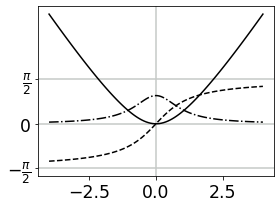

In [3]:
## Visualization of the underlying deviation function.

fig, ax = plt.subplots(1, 1, figsize=(4,3)) # bigger size for detailed viewing.
x_values = np.linspace(-4.0,4.0,100)
ax.axhline(y=-np.pi/2, color="xkcd:silver")
ax.axhline(y=np.pi/2, color="xkcd:silver")
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
ax.plot(x_values, dev(u=x_values), color="xkcd:black", ls="-", label=r"$\rho$")
ax.plot(x_values, dev_d1(u=x_values), color="xkcd:black", ls="--", label=r"$\rho^{\prime}$")
ax.plot(x_values, dev_d2(u=x_values), color="xkcd:black", ls="-.", label=r"$\rho^{\prime\prime}$")
#ax.legend(loc=None, ncol=3, fontsize=my_fontsize)
ticks = [-np.pi/2, 0.0,  np.pi/2]
tick_labels = [r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$"]
ax.set_yticks(ticks)
ax.set_yticklabels(tick_labels)
ax.tick_params(labelsize=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "dev.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()


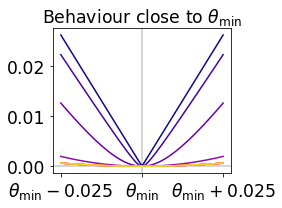

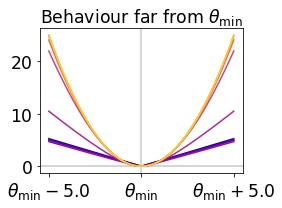

In [4]:
## Visualization for different sigma values.

sigma_list = [0, 0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 40.0, np.inf]
sigma_names = [str(s) for s in sigma_list]

## Colour setup.
sigma_cmap = cm.get_cmap("plasma")
sigma_colours = []
for i in range(len(sigma_list)):
    sigma_colours += [sigma_cmap(i/len(sigma_list))]

loss_value = 1.0

## Narrow domain.
domain_width = 0.05
theta_values = np.linspace(loss_value-domain_width/2, loss_value+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(4,3)) # bigger size for detailed viewing.
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=loss_value, color="xkcd:silver")
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_value-theta_values),
                       sigma=sigma,
                       interpolator=True) # "interpolator" gives ideal median-mean interpolation.
    ax.plot(theta_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ticks = [loss_value-domain_width/2,
         loss_value,
         loss_value+domain_width/2]
tick_labels = [r"$\theta_{\min}-$"+str(domain_width/2),
               r"$\theta_{\min}$",
               r"$\theta_{\min}+$"+str(domain_width/2)]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.set_title(r"Behaviour close to $\theta_{\min}$",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "dev_near.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()


## Wide domain.
domain_width = 10.0
theta_values = np.linspace(loss_value-domain_width/2, loss_value+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(4,3)) # bigger size for detailed viewing.
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=loss_value, color="xkcd:silver")
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_value-theta_values),
                       sigma=sigma,
                       interpolator=True) # "interpolator" gives ideal median-mean interpolation.
    ax.plot(theta_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ticks = [loss_value-domain_width/2,
         loss_value,
         loss_value+domain_width/2]
tick_labels = [r"$\theta_{\min}-$"+str(domain_width/2),
               r"$\theta_{\min}$",
               r"$\theta_{\min}+$"+str(domain_width/2)]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.set_title(r"Behaviour far from $\theta_{\min}$",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "dev_far.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()


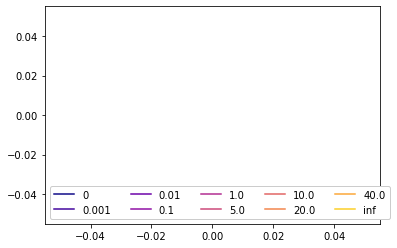

In [5]:
## A standalone legend for visual ease.

labels = []
colours = []
linestyles = []
for i, task in enumerate(sigma_names):
    labels += [ task ]
    colours += [ sigma_colours[i] ]
    linestyles += [ "-" ]

f = lambda m,c,l: plt.plot([],[],marker=m, color=c, ls=l)[0]
handles = [f(None, colours[i], linestyles[i]) for i in range(len(labels))]
legend = plt.legend(handles, labels, loc=3, ncol=5, framealpha=1, frameon=True)
fname = os.path.join(img_dir, "legend_dev.{}".format(my_ext))
#export_legend(legend=legend, filename=fname) # uncomment to save figure.
plt.show()

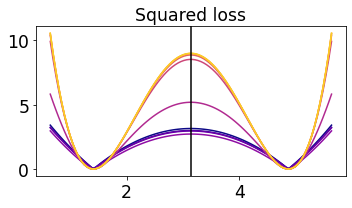

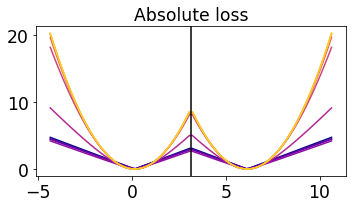

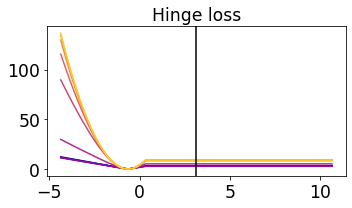

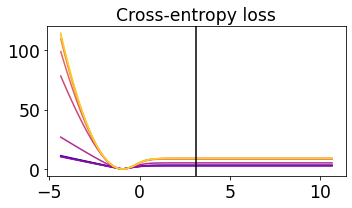

In [6]:
## Visualization in terms of parameter to be learned.

def loss_squared(h, h_star):
    return (h-h_star)**2

def loss_absolute(h, h_star):
    return np.absolute(h-h_star)

def loss_hinge(h, h_star):
    return np.maximum(1-h*h_star,0)

def loss_crossentropy(h, h_star):
    return np.log1p(np.exp(-h_star*h))

theta_value = 3.0
sigma_value = 1.0
h_star = np.pi

## Squared loss.
loss_function = loss_squared
domain_width = 5.0
h_values = np.linspace(h_star-domain_width/2, h_star+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(5,3)) # bigger size for detailed viewing.
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_function(h=h_values, h_star=h_star)-theta_value),
                       sigma=sigma,
                       interpolator=True)
    ax.plot(h_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.axvline(x=h_star, color="black")
ax.set_title("Squared loss",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "composition_square.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()

## Absolute loss.
loss_function = loss_absolute
domain_width = 15.0
h_values = np.linspace(h_star-domain_width/2, h_star+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(5,3)) # bigger size for detailed viewing.
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_function(h=h_values, h_star=h_star)-theta_value),
                       sigma=sigma,
                       interpolator=True)
    ax.plot(h_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.axvline(x=h_star, color="black")
ax.set_title("Absolute loss",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "composition_abs.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()

## Hinge loss.
loss_function = loss_hinge
domain_width = 15.0
h_values = np.linspace(h_star-domain_width/2, h_star+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(5,3)) # bigger size for detailed viewing.
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_function(h=h_values, h_star=h_star)-theta_value),
                       sigma=sigma,
                       interpolator=True)
    ax.plot(h_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.axvline(x=h_star, color="black")
ax.set_title("Hinge loss",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "composition_hinge.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()

## Cross-entropy loss.
loss_function = loss_crossentropy
domain_width = 15.0
h_values = np.linspace(h_star-domain_width/2, h_star+domain_width/2, 100)

fig, ax = plt.subplots(1, 1, figsize=(5,3)) # bigger size for detailed viewing.
for j, sigma in enumerate(sigma_list):
    y_values = dev_ext(u=(loss_function(h=h_values, h_star=h_star)-theta_value),
                       sigma=sigma,
                       interpolator=True)
    ax.plot(h_values, y_values, color=sigma_colours[j], label=sigma_names[j], ls="-")
ax.tick_params(labelsize=my_fontsize)
#ax.legend(loc=0, ncol=2, fontsize=my_fontsize)
ax.axvline(x=h_star, color="black")
ax.set_title("Cross-entropy loss",size=my_fontsize)
plt.tight_layout()
fname = os.path.join(img_dir, "composition_crossent.{}".format(my_ext))
#plt.savefig(fname=fname) # uncomment to save figure.
plt.show()

### Matplotlib references:

- Colormaps etc. https://matplotlib.org/stable/tutorials/colors/colormaps.html
- Named colours. https://matplotlib.org/stable/gallery/color/named_colors.html
- Math fonts built in to matplotlib (really nice). https://matplotlib.org/stable/tutorials/text/mathtext.html
- Constructing custom colorbars on their own. https://matplotlib.org/stable/tutorials/colors/colorbar_only.html
- Filling area between lines. https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html


___